# Measure and Visualize the Similarity between two sets of questions

In [1]:

import matplotlib.pyplot as plt
import pandas as pd

# Load the model
QUESTIONS_BANK0 = pd.read_parquet("../data/350-701-CCNP_no_images_100.parquet") ##CCNP
QUESTIONS_BANK1 = pd.read_parquet("../data/201-301-CCNA_no_images_100.parquet") ##CCNA
QUESTIONS_BANK2 = pd.read_parquet("../data/mmlu_Computer_Security.parquet")
#Read the questions from the questionsbank
questions_ccnp = QUESTIONS_BANK0['question'].tolist()
questions_ccna = QUESTIONS_BANK1['question'].tolist()
questions_mmlu = QUESTIONS_BANK2['question'].tolist()
# Extract questions

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
model = SentenceTransformer('all-mpnet-base-v2')
# Encode questions
embeddings0 = model.encode(questions_ccnp)
embeddings1 = model.encode(questions_ccna)
embeddings2 = model.encode(questions_mmlu)

/home/sb7059/git/GenAICyberSecMCQA/.venv/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


cosine_similarity is:  0.18989167


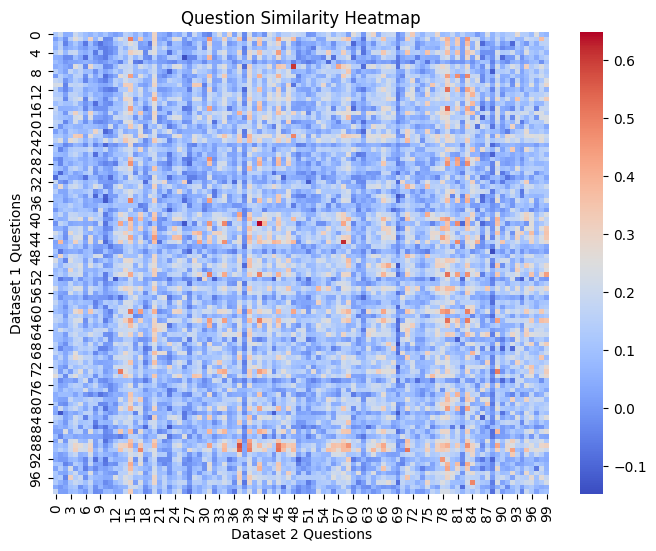

In [3]:
# Compute cosine similarity
similarities = cosine_similarity(embeddings1, embeddings2)

# Calculate the cosine similarity between the embeddings
print("cosine_similarity is: ",similarities[0][1])

# Plot the similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarities, annot=False, cmap='coolwarm')#, xticklabels=questions_mmlu, yticklabels=questions_ccna)
plt.title('Question Similarity Heatmap')
plt.xlabel('Dataset 2 Questions')
plt.ylabel('Dataset 1 Questions')
plt.show()

In [4]:
# display the top 5 questions pairs with the highest similarity
# Get the indices of the top 5 question pairs with the highest similarity
import numpy as np
top_indices = np.unravel_index(np.argsort(similarities, axis=None)[-5:], similarities.shape)

# Display the top 5 question pairs with the highest similarity
for i in range(len(top_indices[0])):
    question_ccna = questions_ccna[top_indices[0][i]]
    question_mmlu = questions_mmlu[top_indices[1][i]]
    similarity = similarities[top_indices[0][i]][top_indices[1][i]]
    print(f"Question CCNA: {question_ccna}")
    print(f"Question MMLU: {question_mmlu}")
    print(f"Similarity: {similarity}")
    print()


Question CCNA: What is a network appliance that checks the state of a packet to determine whether the packet is legitimate?
Question MMLU: A packet filter firewall filters at the
Similarity: 0.5482039451599121

Question CCNA: Which device permits or denies network traffic based on a set of rules?
Question MMLU: A packet filter firewall filters at the
Similarity: 0.5735655426979065

Question CCNA: Which technology is used to improve web traffic performance by proxy caching?
Question MMLU: What is a web proxy?
Similarity: 0.6069208979606628

Question CCNA: Which protocol uses the SSL?
Question MMLU: Encapsulating Security Payload (ESP) belongs to which Internet Security Protocol?
Similarity: 0.6197027564048767

Question CCNA: Which protocol must be implemented to support separate authorization and authentication solutions for wireless APs?
Question MMLU: When a wireless user authenticates to any AP, both of them go in the course of four-step authentication progression which is called ___

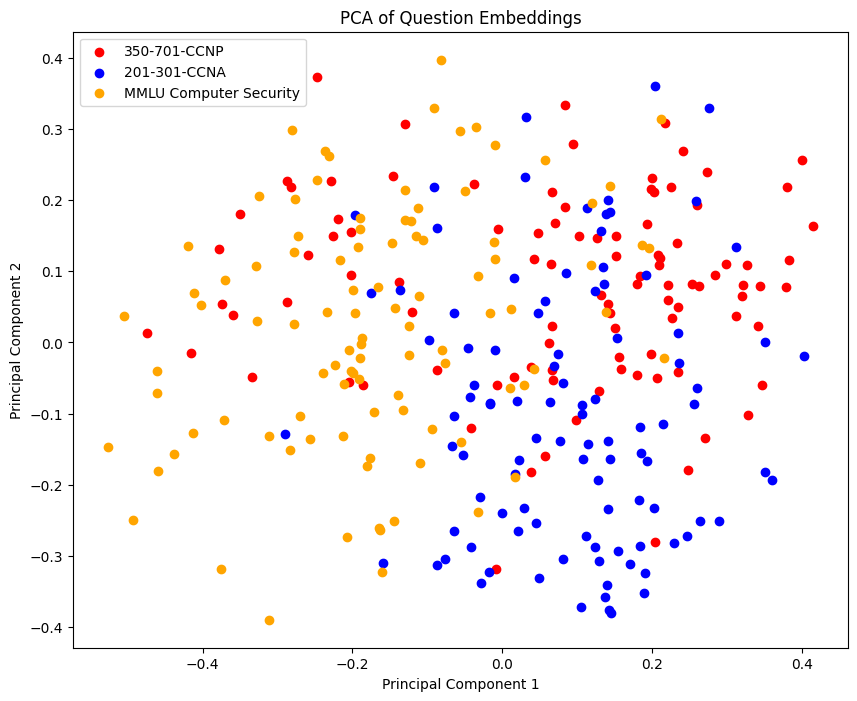

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine the embeddings for PCA
all_embeddings = np.vstack([embeddings0, embeddings1, embeddings2])

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Split the reduced embeddings back into the two sets
reduced_embeddings0 = reduced_embeddings[:len(embeddings0)]
reduced_embeddings1 = reduced_embeddings[len(embeddings0):len(embeddings0) + len(embeddings1)]
reduced_embeddings2 = reduced_embeddings[len(embeddings0) + len(embeddings1):]


# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings0[:, 0], reduced_embeddings0[:, 1], color='red', label='350-701-CCNP')
plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], color='blue', label='201-301-CCNA')
plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], color='orange', label='MMLU Computer Security')
plt.title('PCA of Question Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# t-SNE of Question Embeddings

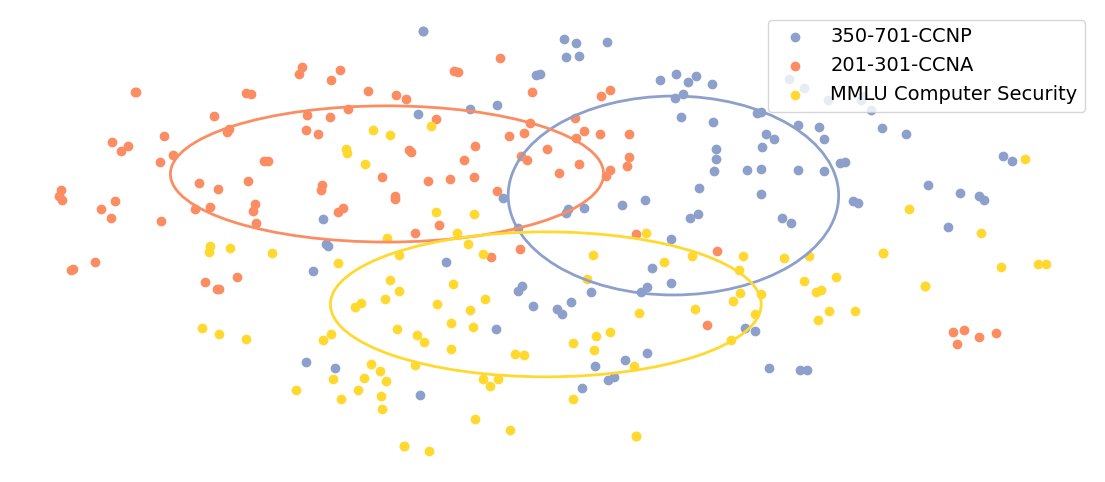

In [13]:
# Create a scatter plot
fig = plt.figure(figsize=(14, 6))
plt.scatter(reduced_embeddings0[:, 0], reduced_embeddings0[:, 1], color=color2, label='350-701-CCNP')
plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], color=color1, label='201-301-CCNA')
plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], color=color3, label='MMLU Computer Security')
# Draw colored oval around the points to show the clusters

# Define the ellipse properties
ellipse_props = {'edgecolor': 'black', 'linewidth': 2, 'fill': False}

# Draw ellipses around the clusters
ellipse0 = Ellipse(xy=(np.mean(reduced_embeddings0[:, 0]), np.mean(reduced_embeddings0[:, 1])),
                   width=np.std(reduced_embeddings0[:, 0]) * 2, height=np.std(reduced_embeddings0[:, 1]) * 2, **ellipse_props)
ellipse1 = Ellipse(xy=(np.mean(reduced_embeddings1[:, 0]), np.mean(reduced_embeddings1[:, 1])),
                   width=np.std(reduced_embeddings1[:, 0]) * 2, height=np.std(reduced_embeddings1[:, 1]) * 2, **ellipse_props)
ellipse2 = Ellipse(xy=(np.mean(reduced_embeddings2[:, 0]), np.mean(reduced_embeddings2[:, 1])),
                   width=np.std(reduced_embeddings2[:, 0]) * 2, height=np.std(reduced_embeddings2[:, 1]) * 2, **ellipse_props)

# Change the colors of the ellipses according to the scatter plot
ellipse0.set_edgecolor(color2)
ellipse1.set_edgecolor(color1)
ellipse2.set_edgecolor(color3)
# Add the ellipses to the plot
plt.gca().add_patch(ellipse0)
plt.gca().add_patch(ellipse1)
plt.gca().add_patch(ellipse2)

# drop all axes
plt.axis('off')

# Add legend to the plot
plt.legend(loc='upper right')

plt.savefig("tsne_overlap.png", dpi=600, bbox_inches='tight')
plt.show()
